# Exploring Earth's Equilibrium Temperature and Climate Forcings
The goal of this notebook is to understand specifically how solar irradiance, planetary albedo, emissivity, and various climate-forcing agents can alter Earth's surface air temperature. This notebook was created by Grace Woolslayer. Please contact grace.woolslayer@temple.edu for any questions or concerns. 

## Before we jump in, I'm importing all the necessary packages and data needed to carry out the analysis:

In [1]:
import pandas as pd                          
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6   

### This dataset is the result of simulated change in global average surface air temperature that results from individual climate forcing agents. They were simulated by NASA's GISS ModelE2 developed at NASA's Goddard Institute for Space Studies.

In [2]:
#defining and storing data sets as variables from our directory that will be used throughout this analysis
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'

NASA_GISS_Response= pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/model_results/NASA_GISS_Response_To_Forcings.csv')
NASA_GISS_Response

,Year,All forcings,Human,Natural,Anthropogenic tropospheric aerosol,Greenhouse gases,Land use,Orbital changes,Ozone,Solar,Volcanic
0,1850,287.467659,287.428996,287.446649,287.425891,287.417000,287.450350,287.442937,287.450645,287.450350,287.446649
1,1851,287.517853,287.433725,287.460201,287.446402,287.399260,287.394453,287.450825,287.407646,287.434744,287.458259
2,1852,287.517558,287.473824,287.530642,287.498657,287.415606,287.482750,287.453118,287.447467,287.466309,287.560542
3,1853,287.478262,287.454695,287.519732,287.417325,287.433217,287.509894,287.468205,287.475366,287.455296,287.534299
4,1854,287.477572,287.417804,287.507810,287.424542,287.420589,287.445774,287.486590,287.454192,287.436233,287.552440
...,...,...,...,...,...,...,...,...,...,...,...
151,2001,288.320929,288.184239,287.526614,286.968754,288.552342,287.323666,287.389576,287.518246,287.472521,287.499175
152,2002,288.335254,288.218673,287.545374,287.022696,288.594759,287.361851,287.399834,287.545542,287.477142,287.504434
153,2003,288.348285,288.259768,287.534229,287.033548,288.595026,287.345990,287.460698,287.503628,287.479919,287.515221
154,2004,288.382879,288.269479,287.559768,287.020872,288.615446,287.320629,287.419639,287.500390,287.491381,287.534006


### This data contains the reconstructed annual mean of total solar irradiance values based on the “Community-Consensus TSI Composite” (Dudok de Wit et al., GRL, 2017) and SATIRE-T model (Wu et al.,A&A, 2018). Computed by Greg Kopp using 'Community-Consensus TSI Composite. [https://spot.colorado.edu/~koppg/TSI/](https://spot.colorado.edu/~koppg/TSI//) 

In [3]:
solar_constant_data = pd.read_csv("https://spot.colorado.edu/~koppg/TSI/Historical_TSI_Reconstruction.txt", skiprows=6, sep=' ').rename(columns={';':'year','Year':'NaN', 'Unnamed: 2':'NaN2', 'Unnamed: 3':'NaN3','TSI':'NaN4', '[W/m^2]':'TSI [W/m^2]'})
solar_constant_data

,year,NaN,NaN2,NaN3,NaN4,TSI [W/m^2]
0,1610.5,NaN,NaN,NaN,NaN,1360.1856
1,1611.5,NaN,NaN,NaN,NaN,1360.4700
2,1612.5,NaN,NaN,NaN,NaN,1360.6798
3,1613.5,NaN,NaN,NaN,NaN,1360.9569
4,1614.5,NaN,NaN,NaN,NaN,1361.0877
...,...,...,...,...,...,...
404,2014.5,NaN,NaN,NaN,NaN,1361.5882
405,2015.5,NaN,NaN,NaN,NaN,1361.7017
406,2016.5,NaN,NaN,NaN,NaN,1361.3384
407,2017.5,NaN,NaN,NaN,NaN,1361.2147


### This dataset contains the observed change in global average surface air temperature (anomalies) for comparison to model results. 

In [4]:
Observed_Temps=pd.read_csv(ees_climate_dir+'2_unit_woolslayer/data/model_results/Observed_Temps.csv')
Observed_Temps

,Year,Annual_Mean,5-year_Mean
0,1880,-0.23,NaN
1,1881,-0.15,NaN
2,1882,-0.18,-0.21
3,1883,-0.21,-0.22
4,1884,-0.29,-0.24
...,...,...,...
130,2010,0.66,0.57
131,2011,0.55,0.59
132,2012,0.57,0.61
133,2013,0.60,NaN


# <span style="color:red">  IMPORTANT EQUATIONS AND CONCEPTS 
Now that the data is imported, it is important to have a basic understanding of Earth's energy balance. In simple terms, the Earth's energy budget is energy in = energy out. The budget involves many other complex equations but for now, all you need to know is the formula that is used to calculate Earth's surface air temperature. From this equation how we can derive a formula that allows us to calculate surface air temperature. 

## What you need to know:



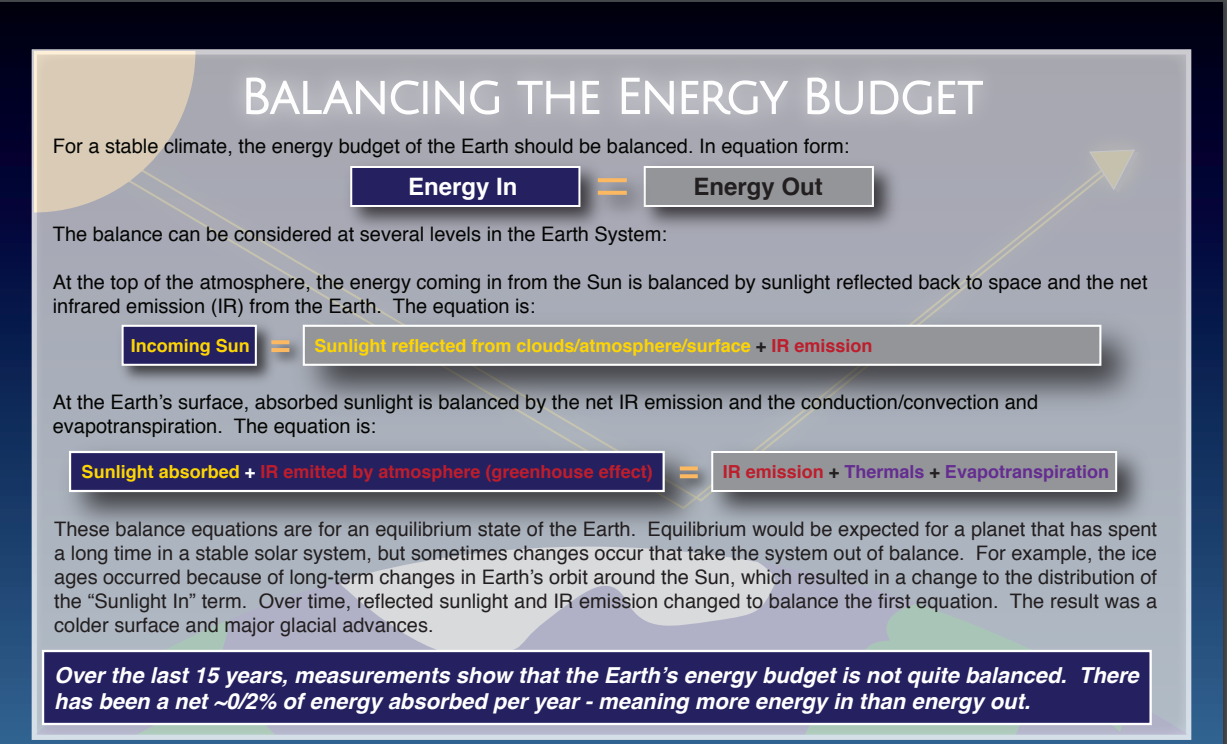

![](https://mynasadata.larc.nasa.gov/sites/default/files/2022-10/earth_energy_budget_storyboard_slide_7_labels_and_numbers.png)

images sourced from [NASA](https://ceres.larc.nasa.gov/images/Earth_Energy_Budget_Diagram_Litho_Handout.pdf)

# How can we calculate the Surface Air Temperature of the Earth?
We use this formula derived from Earth's energy budget equation to calculate the surface air temperature of Earth. If you are interested in the math behind how this formula was derived, the process can be found [here](https://web.archive.org/web/20210605120431/https://scied.ucar.edu/earth-system/planetary-energy-balance-temperature-calculate).

![](https://media.wired.com/photos/63dbd007a90e0957d7e9597c/master/w_1600%2Cc_limit/finaltemperature_science.jpg)

# What is Total Solar Irradiance?

Total Solar Irradiance (TSI) is a measure of the total radiation that is received by the top of the earth's atmosphere measured in Wm-2 ([NOAA](https://www.ngdc.noaa.gov/stp/solar/solarirrad.html)). TSI is also referred to as the Solar Constant (S0) which is used in the equation to calculate the total energy that is absorbed by the earth. However, observational records indicate that TSI varies and is not a true constant. Below is the TSI average from 1610 to 2018 which is the value used for the solar constant. The interannual variability of TSI is also calculated below. Although this number is small in magnitude, it proves that there is a variation of the total solar irradiance that is received which can account for some of the variations of earth's surface temperatures.  However, most of the temperature variations seen today are largely manmade ([Mendoza](https://doi.org/10.1016/j.asr.2004.10.011)).

In [6]:
#this is the TSI average which is known as the solar constant. even though TSI is known to vary, we use this value in calculations when asked for the solar constant
solar_constant_mean=solar_constant_data['TSI [W/m^2]'].mean()
solar_constant_mean

1360.9803982885085

In [7]:
#this is how much TSI varies from the average value of 1360.98. we see that the variability is relatively small which is why we can dub the mean value of TSI as a constant
solar_constant_variabililty=solar_constant_data['TSI [W/m^2]'].std()
solar_constant_variabililty

0.4736141972795096

# The TSI Record

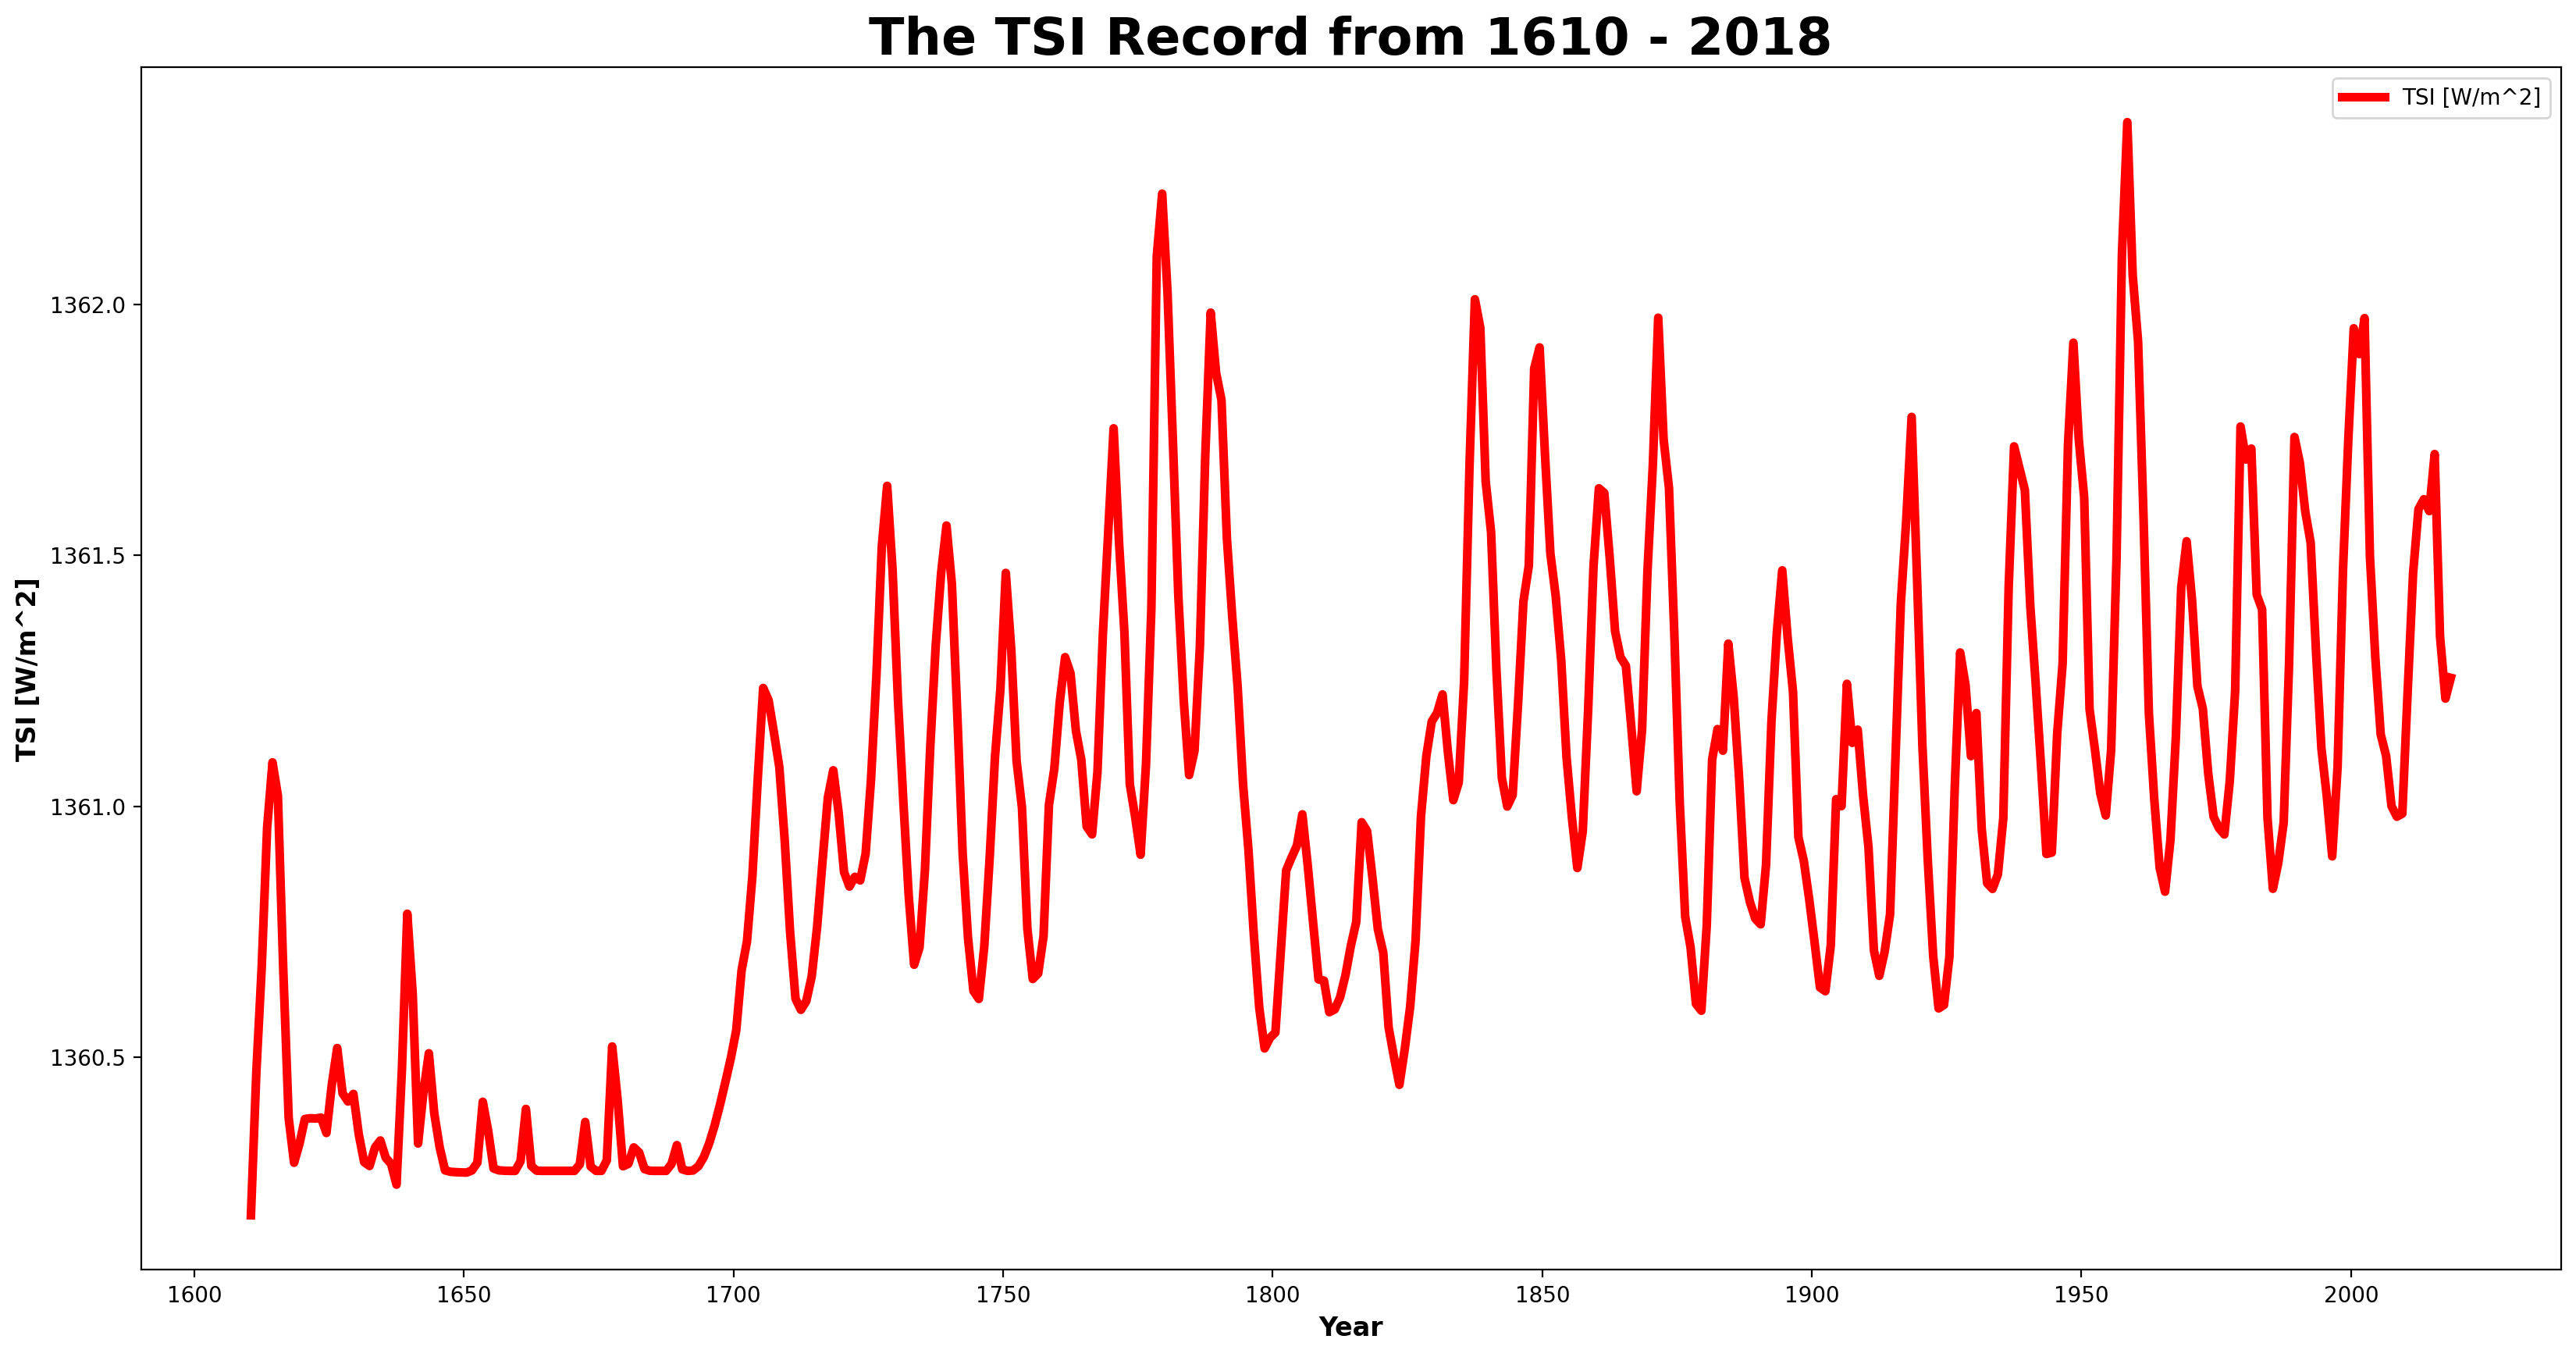

In [86]:
#creating a plot to visualize the variation of TSI throughout the years
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(solar_constant_data['year'],
         solar_constant_data['TSI [W/m^2]'],
         linewidth=4,label='TSI [W/m^2]',
         color='red')

#customizing my chart
ax.set_title('The TSI Record from 1610 - 2018',
             fontsize=24, fontweight='bold')
ax.set_ylabel('TSI [W/m^2]',
             fontsize=12, fontweight='bold')
ax.set_xlabel('Year',
             fontsize=12, fontweight='bold')
plt.legend()

**Figure 1.** Total solar irradiance reconstruction throughout the years from “Community-Consensus TSI Composite” (Dudok de Wit et al., GRL, 2017) and SATIRE-T model (Wu et al.,A&A, 2018).

# What Causes These Short Term Variations?
Short-term variations in TSI can be explained by the natural 11-year solar cycles caused by the sun's reconfiguration of its magnetic field. Every 11 years or so, the sun's magnetic poles flip ([NASA](https://svs.gsfc.nasa.gov/4892#:~:text=Sunspots%20form%20in%20regions%20with%20stronger%20magnetic%20fields,and%20are%20hotter%2C%20and%20brighter%2C%20than%20the%20photosphere.)). During this time, solar minimums and maximums are observed.  During periods of solar maximums, the Sun's magnetic field builds up regions of intense magnetification. Sunspots and faculae form in these regions and are the main factors that affect TSI variation in the observed records. Sunspots are regions that appear darker on the hot, solar surface. They can be responsible for solar flares which are eruptive disturbances ([SPACE](https://www.space.com/sunspots-formation-discovery-observations)). Surrounding most of the sunspots, are brighter, hotter, patchy regions known as faculae. Wider regions of faculae cause more solar energy output than is taken away by cooler, smaller sunspots. This produces a small increase in solar luminosity which determines a solar maximum period ([NASA](https://svs.gsfc.nasa.gov/4892#:~:text=Sunspots%20form%20in%20regions%20with%20stronger%20magnetic%20fields,and%20are%20hotter%2C%20and%20brighter%2C%20than%20the%20photosphere.)).

# The Maunder Minimum
Just as there can be periods of time with higher solar activity, there can be periods of lower solar activity as well. The Maunder Minimum is denoted as a period of extremely low solar activity from 1650 - 1715. Let's take a look and see what the average global surface air temperature would be during this time, assuming that albedo stays the same and we ignore the insulation that greenhouse gases (GHG) provide.

In [9]:
#slicing the time period 1650-1715 to look at what the TSI values are for the Maunder Minimum  using the .between method (found this method on stack overflow)
maunder_minimum=solar_constant_data[solar_constant_data['year'].between(1650.5,1715.5)]
maunder_minimum

,year,NaN,NaN2,NaN3,NaN4,TSI [W/m^2]
40,1650.5,NaN,NaN,NaN,NaN,1360.2706
41,1651.5,NaN,NaN,NaN,NaN,1360.2750
42,1652.5,NaN,NaN,NaN,NaN,1360.2905
43,1653.5,NaN,NaN,NaN,NaN,1360.4116
44,1654.5,NaN,NaN,NaN,NaN,1360.3536
...,...,...,...,...,...,...
101,1711.5,NaN,NaN,NaN,NaN,1360.6168
102,1712.5,NaN,NaN,NaN,NaN,1360.5948
103,1713.5,NaN,NaN,NaN,NaN,1360.6123
104,1714.5,NaN,NaN,NaN,NaN,1360.6612


In [10]:
#calculating the mean TSI during the maunder minimum
maunder_minimum_mean=maunder_minimum['TSI [W/m^2]'].mean()
maunder_minimum_mean

1360.4391772727274

### The mean during this period is slightly lower than the mean calculated from the whole record

In [11]:
#calculating the current surface air temperature for Earth
T_Earth= ((solar_constant_mean*(1-alpha))/(4*sigma*epsilon))**(1/4)
T_Earth #in kelvin

254.58142612930314

In [12]:
#calculating the surface air temperature for Earth during the maunder minimum
maunder_minimum_temp=((maunder_minimum_mean*(1-alpha))/(4*sigma*epsilon))**(1/4)
maunder_minimum_temp #in kelvin

254.55611250790184

### difference between the Maunder Minimum and the average temperature of the earth 

In [13]:
difference=T_Earth-maunder_minimum_temp
difference

0.02531362140129545

### <span style="color:red"> There would only be a drop of 0.025 in global average surface air temperature during the Maunder Minimum

In [14]:
#isolating the TSI values from the solar constant data set
TSI=solar_constant_data['TSI [W/m^2]']
TSI

0      1360.1856
1      1360.4700
2      1360.6798
3      1360.9569
4      1361.0877
         ...    
404    1361.5882
405    1361.7017
406    1361.3384
407    1361.2147
408    1361.2560
Name: TSI [W/m^2], Length: 409, dtype: float64

In [92]:
#creating a function that I can pass different TSI values through that will calculate a new surface air temps for the whole dataset 
def T_Earth (TSI):

    #reading in the solar constant data
    solar_constant_data = pd.read_csv("https://spot.colorado.edu/~koppg/TSI/Historical_TSI_Reconstruction.txt", skiprows=6, sep=' ').rename(columns={';':'year','Year':'NaN', 'Unnamed: 2':'NaN2', 'Unnamed: 3':'NaN3','TSI':'NaN4', '[W/m^2]':'TSI [W/m^2]'})

    alpha=0.3                               # earth's albedo - unitless
    sigma = 5.67e-8                         # Stefan-Boltzman constant W⋅m−2⋅K−4
    epsilon = 1                             # Emissivity for a blackbody - unitless
    TSI=solar_constant_data['TSI [W/m^2]']  # solar constnt W*m-2
                    
    
    new_earth_temp=((TSI*(1-alpha))/(4*sigma*epsilon))**(1/4)
    
    return new_earth_temp

In [89]:
#calling the function and passing the TSI values through it
surface_air_temp=T_Earth(TSI)
surface_air_temp

0      254.544250
1      254.557554
2      254.567368
3      254.580327
4      254.586444
          ...    
404    254.609845
405    254.615151
406    254.598166
407    254.592382
408    254.594313
Name: TSI [W/m^2], Length: 409, dtype: float64

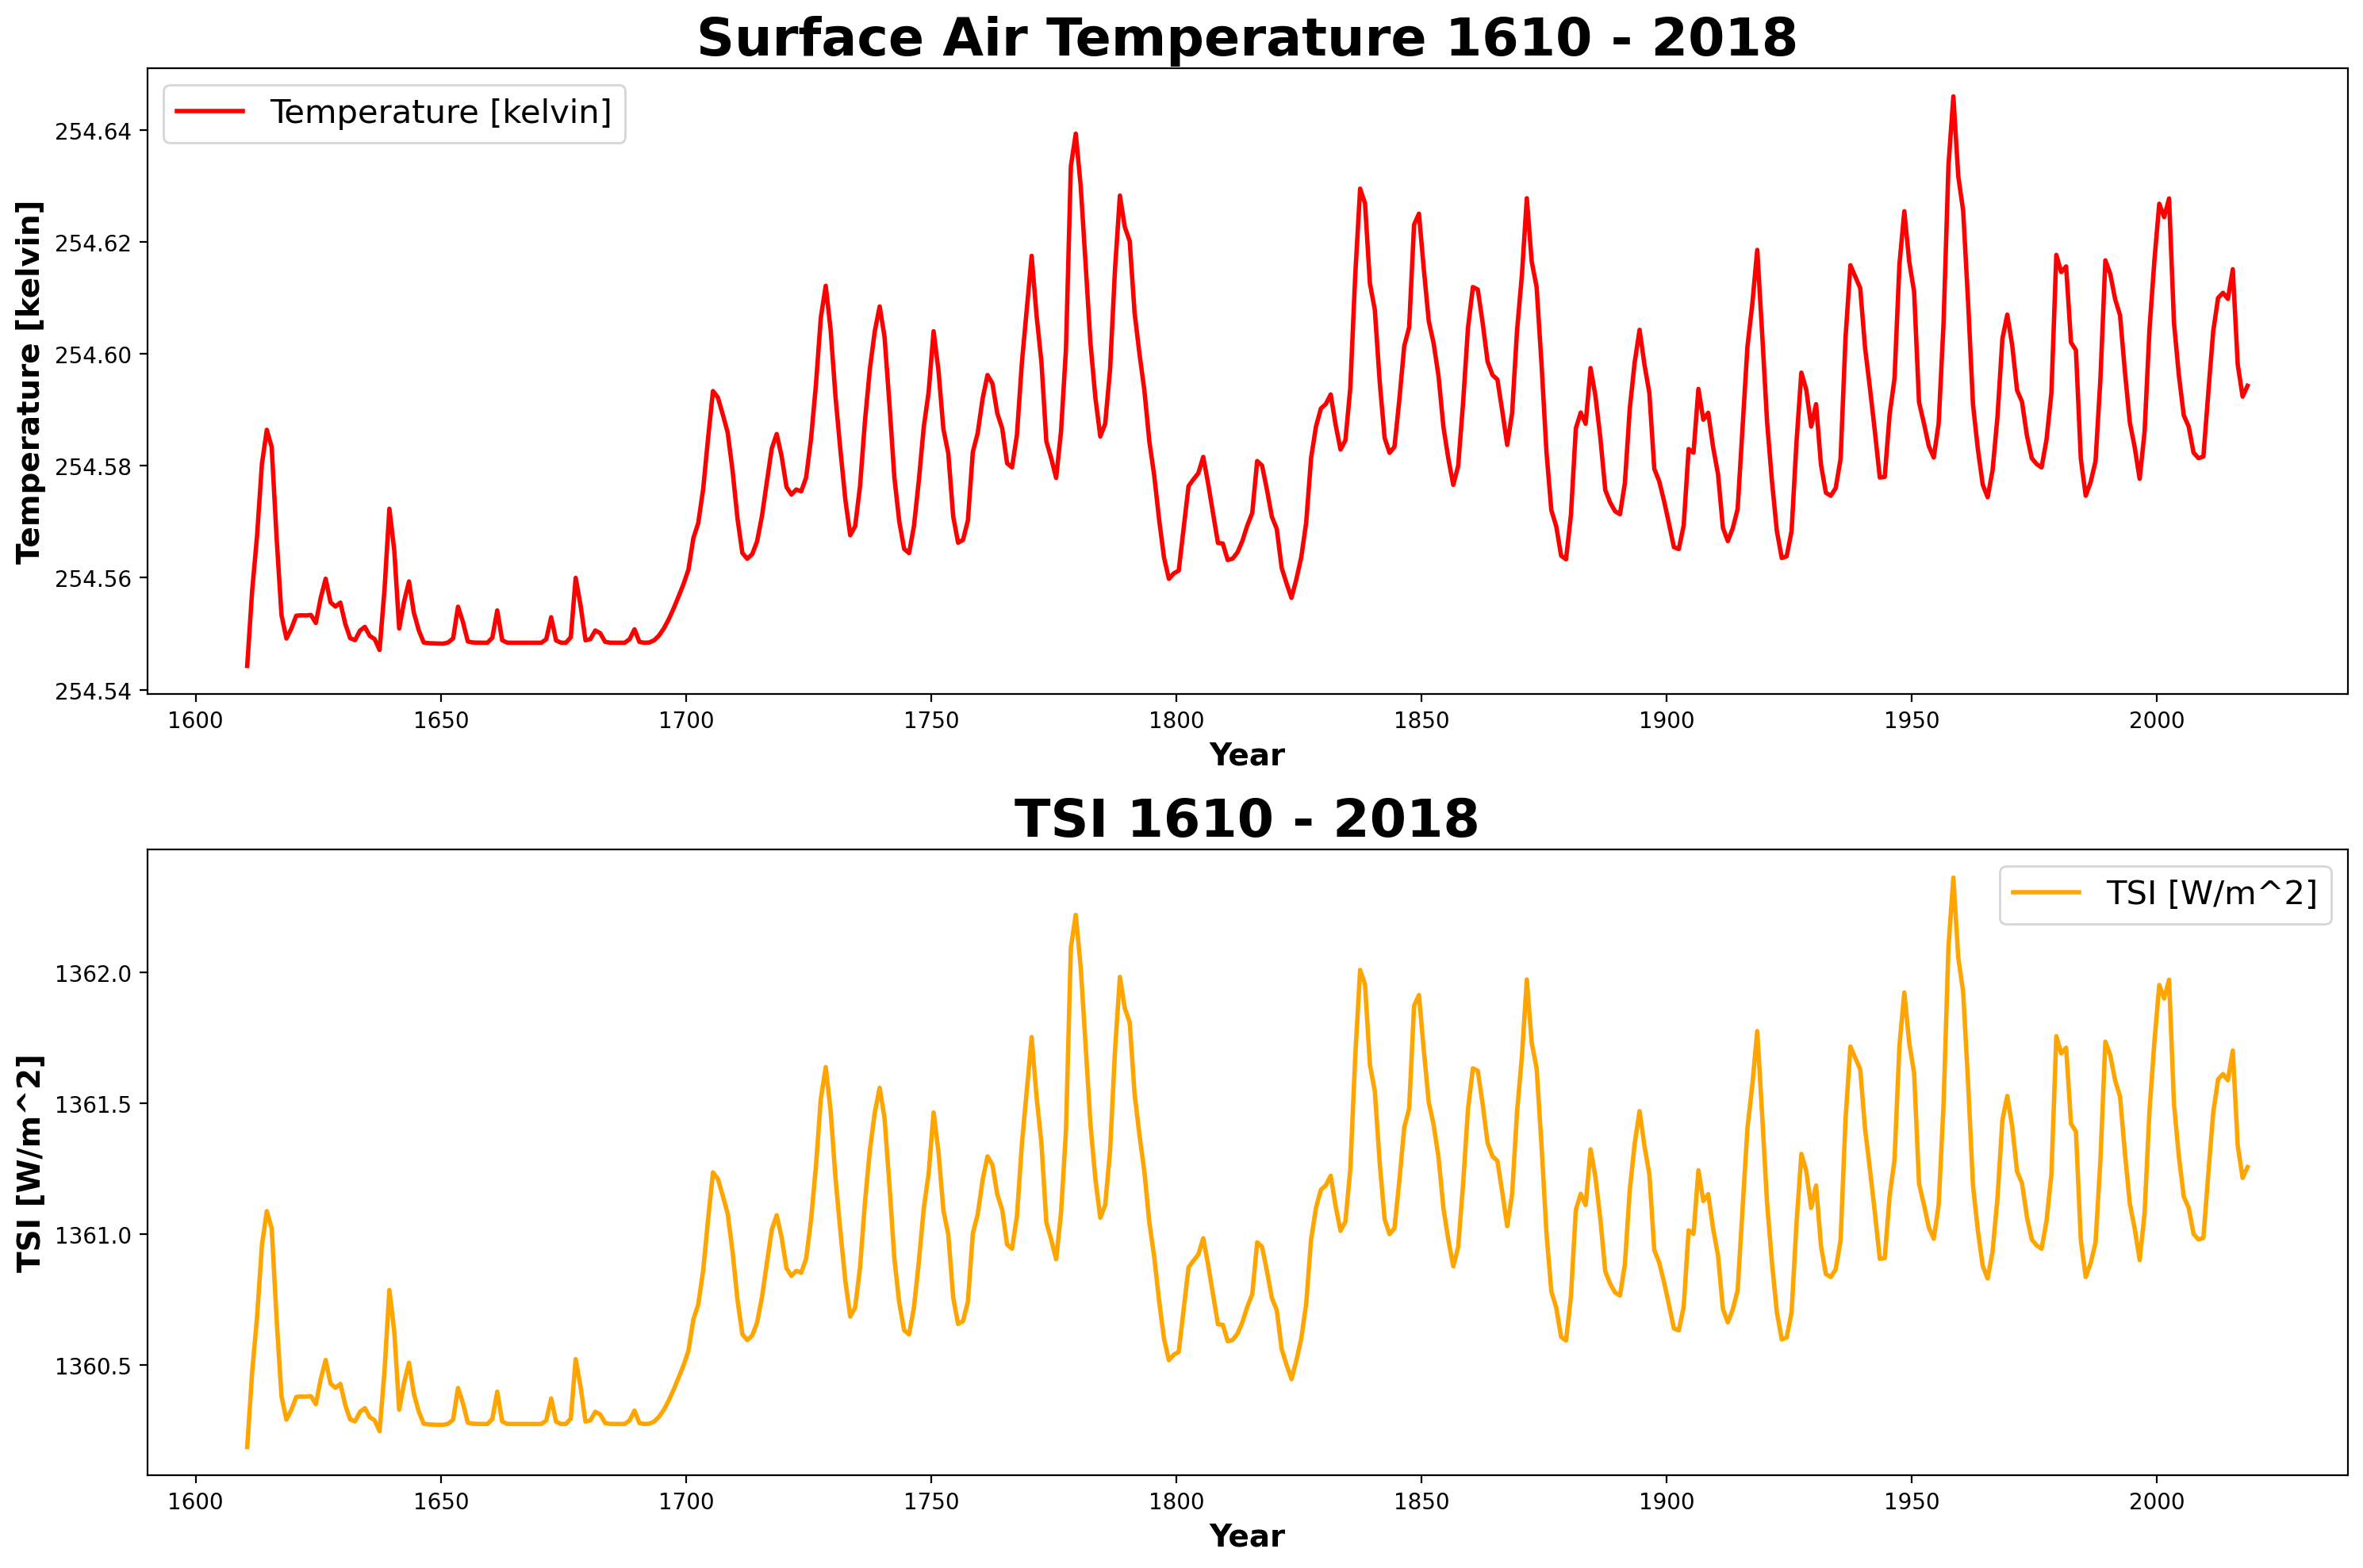

In [37]:
#creating a plot to visualize the TSI and surface air temperature side by side
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

#surface air temperature plot
ax1.plot(solar_constant_data['year'], surface_air_temp, linewidth=2,label='Temperature [kelvin]', color='red')
ax1.set_title('Surface Air Temperature 1610 - 2018', fontsize=24, fontweight='bold')
ax1.set_ylabel('Temperature [kelvin]', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.legend(fontsize=15)

#TSI plot
ax2.plot(solar_constant_data['year'], solar_constant_data['TSI [W/m^2]'], linewidth=2,label='TSI [W/m^2]', color='orange')
ax2.set_title('TSI 1610 - 2018', fontsize=24, fontweight='bold')
ax2.set_ylabel('TSI [W/m^2]', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=14, fontweight='bold')
ax2.legend(fontsize=15)

plt.tight_layout()


**Figure 2.** Surface air temperature from T_Earth function graphed alongside TSI values through 1610-2018 from Total solar irradiance reconstruction throughout the years from “Community-Consensus TSI Composite” (Dudok de Wit et al., GRL, 2017) and SATIRE-T model (Wu et al.,A&A, 2018).

In [18]:
#calculating the mean surface air temp
surface_air_temp_mean=surface_air_temp.mean()
surface_air_temp_mean

254.58142324621127

In [19]:
#calculating the standard deviation of the surface air temp
surface_air_temp_std=surface_air_temp.std()
surface_air_temp_std

0.022147534663143086

In [20]:
#calculating the mean solar constant again
solar_constant_mean=solar_constant_data['TSI [W/m^2]'].mean()
solar_constant_mean

1360.9803982885085

In [21]:
#calculating the standard deviation of the solar constant
solar_constant_variabililty=solar_constant_data['TSI [W/m^2]'].std()
solar_constant_variabililty

0.4736141972795096


|Variable|TSI|T_Earth|
|---|---|---|
|std|0.4736141972795096|0.022147534663143086|
|mean|1360.9803982885085|254.58142324621127|


In [22]:
#T_Earth std / T_Earth mean * 100 
#calculates a percent that quantifies the amount of variability of earth's surface temperatures due to fluctuations in TSI
(0.022147534663143086/254.58142324621127)*100 

0.008699587888517584

Relative to earth's global mean surface temperature, th TSI only amounts to 0.01% of the variability we see in Earth's Temperature variation. Since it has such little impact, we can consider the TSI to be a constant value in calculations. 

# The Role of Albedo
Albedo plays an important role in determining Earth's surface air temperature and has changed throughout time. Albedo is a fraction of light that a surface reflects. The scale for albedo ranges from 0-1. If a surface has an albedo of 1, it reflects all light that it encounters. If a surface has an albedo of 0, it would indicate that that surface doesn't reflect any light. The Earth has an average albedo of 0.3 which means on average, it only reflects 30% of the sun's light that hits it ([NASA](https://mynasadata.larc.nasa.gov/mini-lessonactivity/what-albedo)). There is an inversely proportional relationship between albedo and surface temperatures. If a surface has a high albedo, it means it is able to reflect a lot of light and doesn't absorb as much light energy, which is associated with lower temperatures. If a surface has a low albedo, that means that it doesn't reflect as much light and instead absorbs it, leading to a higher internal temperature. If planetary albedo were to decrease to a value of 0.1, meaning most of Earth's surface is dark, we would see an increase in surface temperatures. If the Earth was completely covered by ice and snow, [NASA](https://earthobservatory.nasa.gov/images/84499/measuring-earths-albedo#:~:text=If%20Earth%20was%20completely%20covered,the%20sunlight%20would%20get%20absorbed) calculated that the albedo would be around 0.84. This is because the surface of the Earth would be much more reflective. A process that would increase planetary albedo would be volcanic eruption events. During these events, mass amounts of aerosols are released into the atmosphere that scatter incoming short-wave radiation and make the surface more reflective with its consequential ash. Something that would decrease planetary albedo would be a loss of sea ice and snow. The loss of those reflective surfaces would expose the dark areas that lay beneath, allowing for more short-wave radiation to be absorbed rather than reflected back into space. Below are graphs that will help you visualize this. Although they may look the same, pay attention to the y-axis that measures the surface temperatures in kelvin.

In [93]:
#creating a function that I can pass different albedo values through that will calculate a new surface air temps for the whole dataset 
def T_Earth (Albedo):
    
    #reading in the solar constant data
    solar_constant_data = pd.read_csv("https://spot.colorado.edu/~koppg/TSI/Historical_TSI_Reconstruction.txt", skiprows=6, sep=' ').rename(columns={';':'year','Year':'NaN', 'Unnamed: 2':'NaN2', 'Unnamed: 3':'NaN3','TSI':'NaN4', '[W/m^2]':'TSI [W/m^2]'})
                          
    sigma = 5.67e-8                         # Stefan-Boltzman constant W⋅m−2⋅K−4
    epsilon = 1                             # Emissivity for a blackbody - unitless
    TSI=solar_constant_data['TSI [W/m^2]']  # solar constnt W*m-2
                    
    
    new_earth_temp=((TSI*(1-Albedo))/(4*sigma*epsilon))**(1/4)
    
    return new_earth_temp

In [66]:
low_albedo=T_Earth(0.1)
low_albedo

0      271.049998
1      271.064165
2      271.074615
3      271.088415
4      271.094928
          ...    
404    271.119846
405    271.125496
406    271.107410
407    271.101251
408    271.103308
Name: TSI [W/m^2], Length: 409, dtype: float64

In [68]:
high_albedo=T_Earth(0.84)
high_albedo

0      176.002476
1      176.011675
2      176.018460
3      176.027421
4      176.031650
          ...    
404    176.047831
405    176.051499
406    176.039756
407    176.035756
408    176.037092
Name: TSI [W/m^2], Length: 409, dtype: float64

In [69]:
current_albedo=T_Earth(0.3)
current_albedo

0      254.544250
1      254.557554
2      254.567368
3      254.580327
4      254.586444
          ...    
404    254.609845
405    254.615151
406    254.598166
407    254.592382
408    254.594313
Name: TSI [W/m^2], Length: 409, dtype: float64

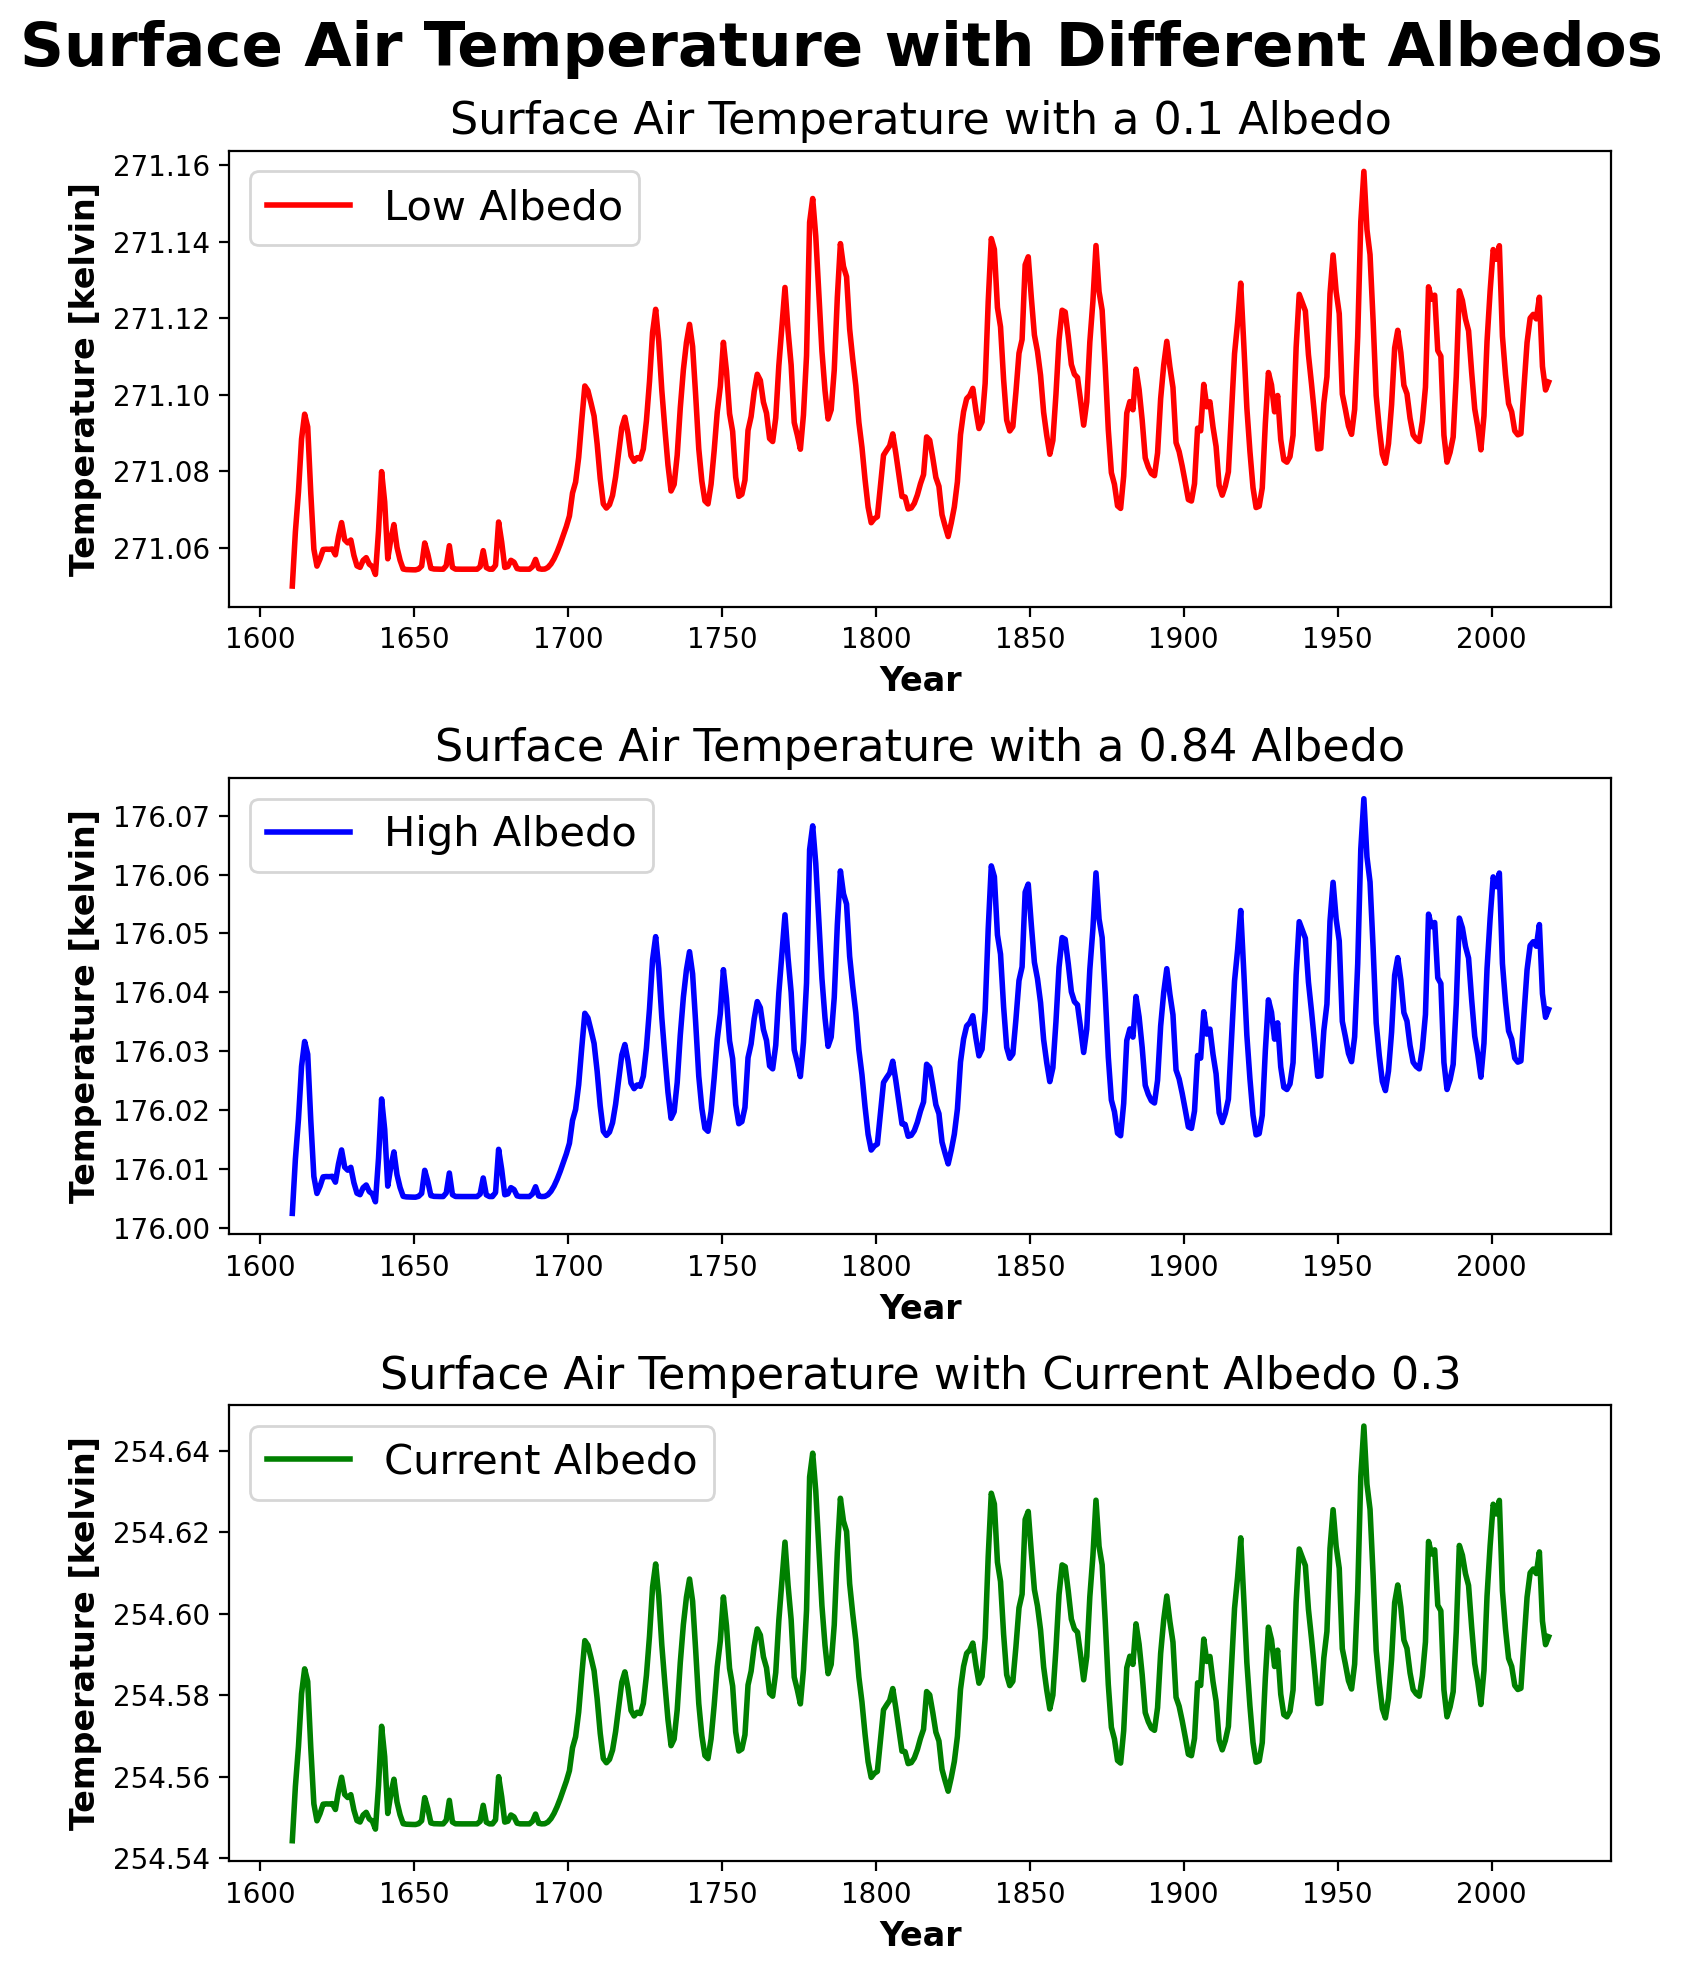

In [75]:
#creating a plot to compare the surface air temperatures of Earth with different albedos
fig, (ax1,ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
fig.suptitle('Surface Air Temperature with Different Albedos', fontsize=22,fontweight='bold')

ax1.plot(solar_constant_data['year'],low_albedo, linewidth=2,label='Low Albedo', color='red')
ax1.set_title('Surface Air Temperature with a 0.1 Albedo', fontsize=16)
ax1.set_ylabel('Temperature [kelvin]', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.legend(fontsize=15)

ax2.plot(solar_constant_data['year'],high_albedo,linewidth=2,label='High Albedo',color='blue')
ax2.set_title('Surface Air Temperature with a 0.84 Albedo', fontsize=16)
ax2.ticklabel_format(useOffset=False) #this is to prevent the temp labels from displaying the values in scientific notation 
ax2.set_ylabel('Temperature [kelvin]', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.legend(fontsize=15)

ax3.plot(solar_constant_data['year'],current_albedo,linewidth=2,label='Current Albedo', color='green')
ax3.set_title('Surface Air Temperature with Current Albedo 0.3', fontsize=16)
ax3.set_ylabel('Temperature [kelvin]', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year', fontsize=12, fontweight='bold')
ax3.legend(fontsize=15)

plt.tight_layout()

**Figure 3.** Comparing surface air temperatures forced by various albedo values 0.1, 0.84, 0.3. The insulation effect from GHGs was ignored. All three scenarios see the same variation caused by the solar cycle but yield highly contrasting temperature values. 

#  Earth is Considered a Black Body
A black body is considered a perfect emitter and an idealized surface in physics that absorbs all radiant energy it encounters. Earth is not a perfect black body but is considered one because of its high water content that has an emissivity of 0.97 ([Robinson, Davies](https://doi.org/10.1175/1520-0450(1972)011<1391:LDOWSE>2.0.CO;2)). Emissivity is a unitless ratio that measures the percentage of thermal energy emitted or given off by a surface. An emissivity value of zero indicates that a surface is a perfect reflector and a value of 1 indicates the surface is a perfect emitter ([NPL](https://www.npl.co.uk/resources/q-a/why-is-emissivity-important)). The difference between emitting and reflecting is a concept that often gets confused. A surface that reflects light does not absorb any of it. The light is bounced off the surface and "given back". When a surface emits light, it is first absorbed and then given off or radiated as "new" light. Data from NASA's database indicated that the emissivity of Earth varies from 0.6 to 1.0. Average values of Earth's emissivity range from 0.9 to 1.0 with a final value of 0.94 being used in a recent study using a heat transfer model to further analyze global warming ([E.William Beans](https://doi.org/10.1016/j.csite.2022.102677)). However, to simplify and standardize climate calculations, Earth is treated like a black body and is assigned the emissivity of 1, the same as a black body. What would happen if Earth was not treated as a black body? Let's take a look if emissivity (epsilon in the temperature equation) were to change.

In [94]:
#creating a function that I can pass different emissivity values through that will calculate a new surface air temps for the whole dataset 
def T_Earth (emissivity):
    
    #reading in the solar constant data
    solar_constant_data = pd.read_csv("https://spot.colorado.edu/~koppg/TSI/Historical_TSI_Reconstruction.txt", skiprows=6, sep=' ').rename(columns={';':'year','Year':'NaN', 'Unnamed: 2':'NaN2', 'Unnamed: 3':'NaN3','TSI':'NaN4', '[W/m^2]':'TSI [W/m^2]'})

    alpha = 0.3                             # earth's albedo - unitless
    sigma = 5.67e-8                         # Stefan-Boltzman constant W⋅m−2⋅K−4                      
    TSI=solar_constant_data['TSI [W/m^2]']  # solar constnt W*m-2
   
    new_earth_temp=((TSI*(1-alpha))/(4*sigma*emissivity))**(1/4)
    
    return new_earth_temp

In [81]:
low_emissivity=T_Earth(0.6)
low_emissivity

0      289.218106
1      289.233223
2      289.244373
3      289.259098
4      289.266048
          ...    
404    289.292637
405    289.298665
406    289.279367
407    289.272795
408    289.274990
Name: TSI [W/m^2], Length: 409, dtype: float64

In [82]:
actual_emissivity=T_Earth(0.94)
actual_emissivity

0      258.512369
1      258.525881
2      258.535847
3      258.549009
4      258.555221
          ...    
404    258.578986
405    258.584375
406    258.567126
407    258.561252
408    258.563213
Name: TSI [W/m^2], Length: 409, dtype: float64

In [83]:
black_body_emissivity=T_Earth(1)
black_body_emissivity

0      254.544250
1      254.557554
2      254.567368
3      254.580327
4      254.586444
          ...    
404    254.609845
405    254.615151
406    254.598166
407    254.592382
408    254.594313
Name: TSI [W/m^2], Length: 409, dtype: float64

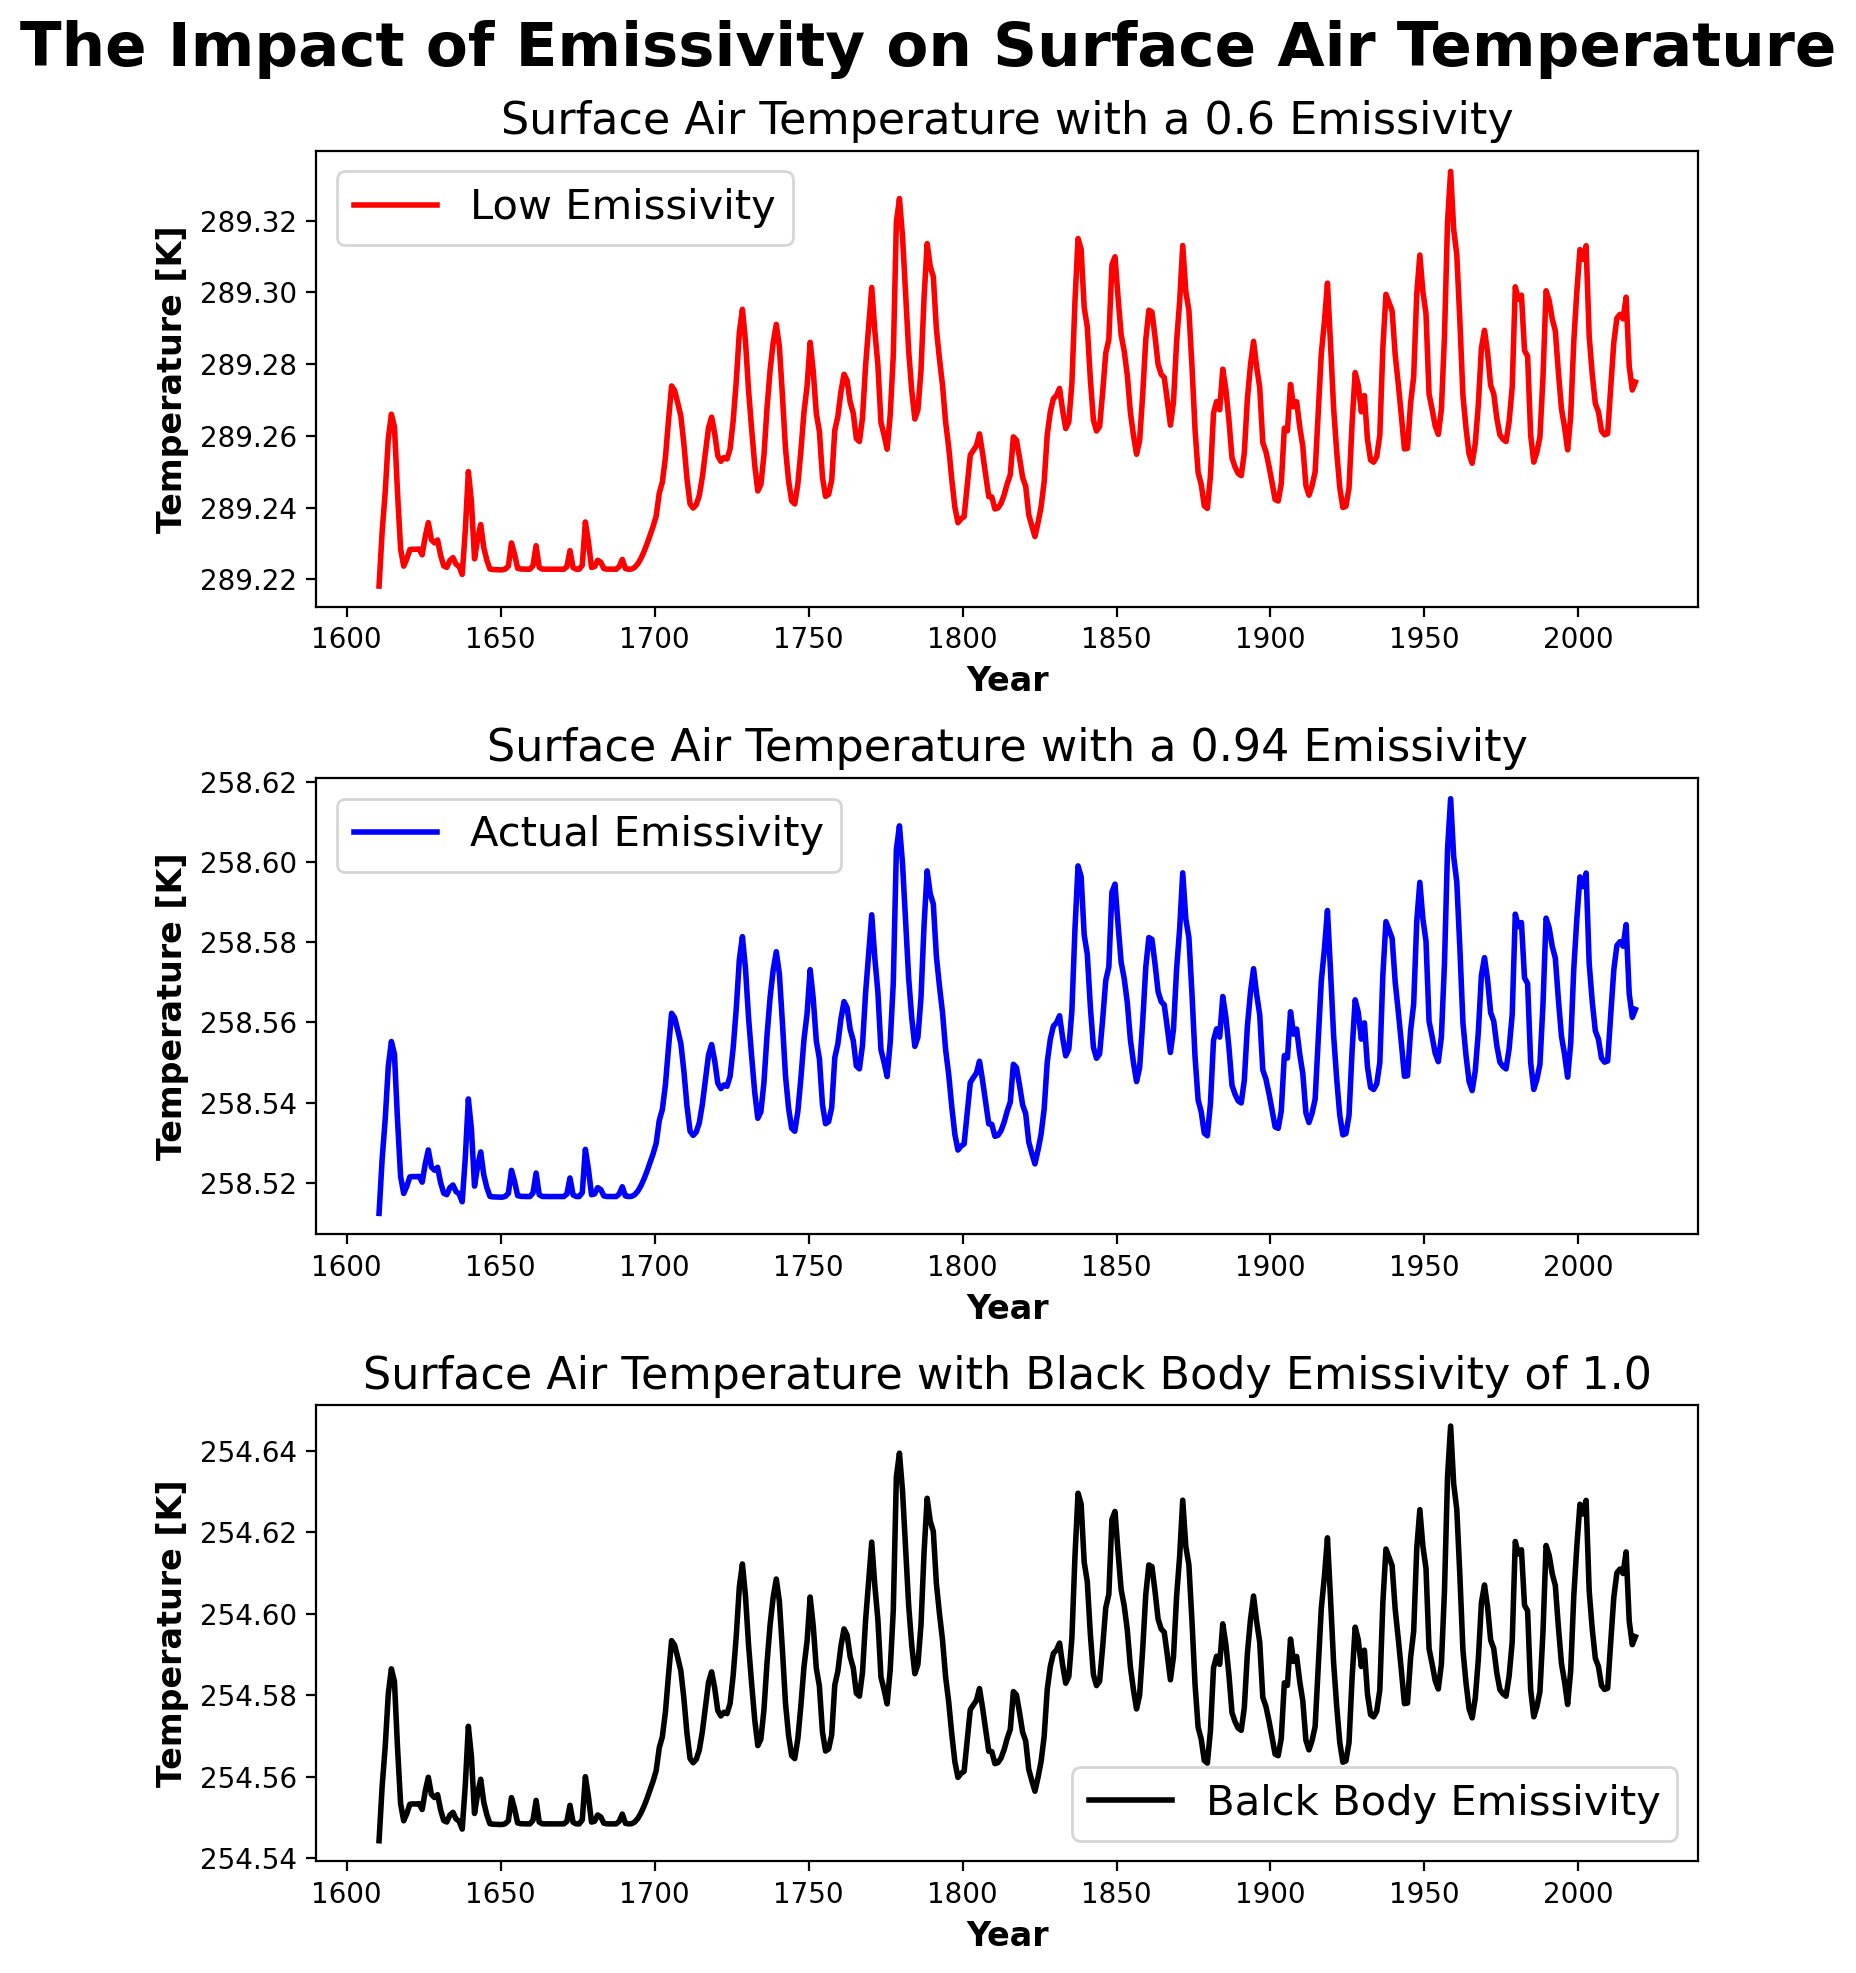

In [90]:
#creating a plot to compare the surface air temperatures of Earth with different emissivities
fig, (ax1,ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
fig.suptitle('The Impact of Emissivity on Surface Air Temperature', fontsize=22, fontweight='bold')

ax1.plot(solar_constant_data['year'],low_emissivity, linewidth=2,label='Low Emissivity', color='red')
ax1.set_title('Surface Air Temperature with a 0.6 Emissivity', fontsize=16)
ax1.set_ylabel('Temperature [K]', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.legend(fontsize=15)

ax2.plot(solar_constant_data['year'],actual_emissivity,linewidth=2,label='Actual Emissivity',color='blue')
ax2.set_title('Surface Air Temperature with a 0.94 Emissivity', fontsize=16)
ax2.ticklabel_format(useOffset=False) #this is to prevent the temp labels from displaying the values in scientific notation 
ax2.set_ylabel('Temperature [K]', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.legend(fontsize=15)

ax3.plot(solar_constant_data['year'],black_body_emissivity,linewidth=2,label='Balck Body Emissivity', color='black')
ax3.set_title('Surface Air Temperature with Black Body Emissivity of 1.0', fontsize=16)
ax3.set_ylabel('Temperature [K]', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year', fontsize=12, fontweight='bold')
ax3.legend(fontsize=15)

plt.tight_layout()

**Figure 4.** Comparing surface air temperatures if Earth were to have various emissivities of 0.6, 0.94, 1.0.

After looking at the graphs, we can see that a lower emissivity results in higher temperatures. Remember that emissivity is a ratio that measures the amount of energy emitted or radiated back into the atmosphere. Black bodies are perfect emitters because they reemit all the radiation they absorb. In real life, not all the energy that is absorbed is reemitted. Some of the radiation that is absorbed is transformed and manifests itself as heat energy which raises the internal temperature ([Andor](https://andor.oxinst.com/learning/view/article/absorption-of-light)). Earth's emissivity is dependent on land use, land cover, and the mineral composition of that land. Areas of high emissivity are characterized by areas concentrated with vegetation, water, or ice. Areas with low emissivities are seen in regions with high concentrations of quartz sands ([NASA](https://terra.nasa.gov/news/aster-global-emissivity-database-100-times-more-detailed-than-its-predecessors)). Given this information, processes like deforestation and sea ice loss could lower Earth's emissivity, leading to warmer surface temperatures.

# The Impact of Various Forcing Agents on Surface Air Temperatures

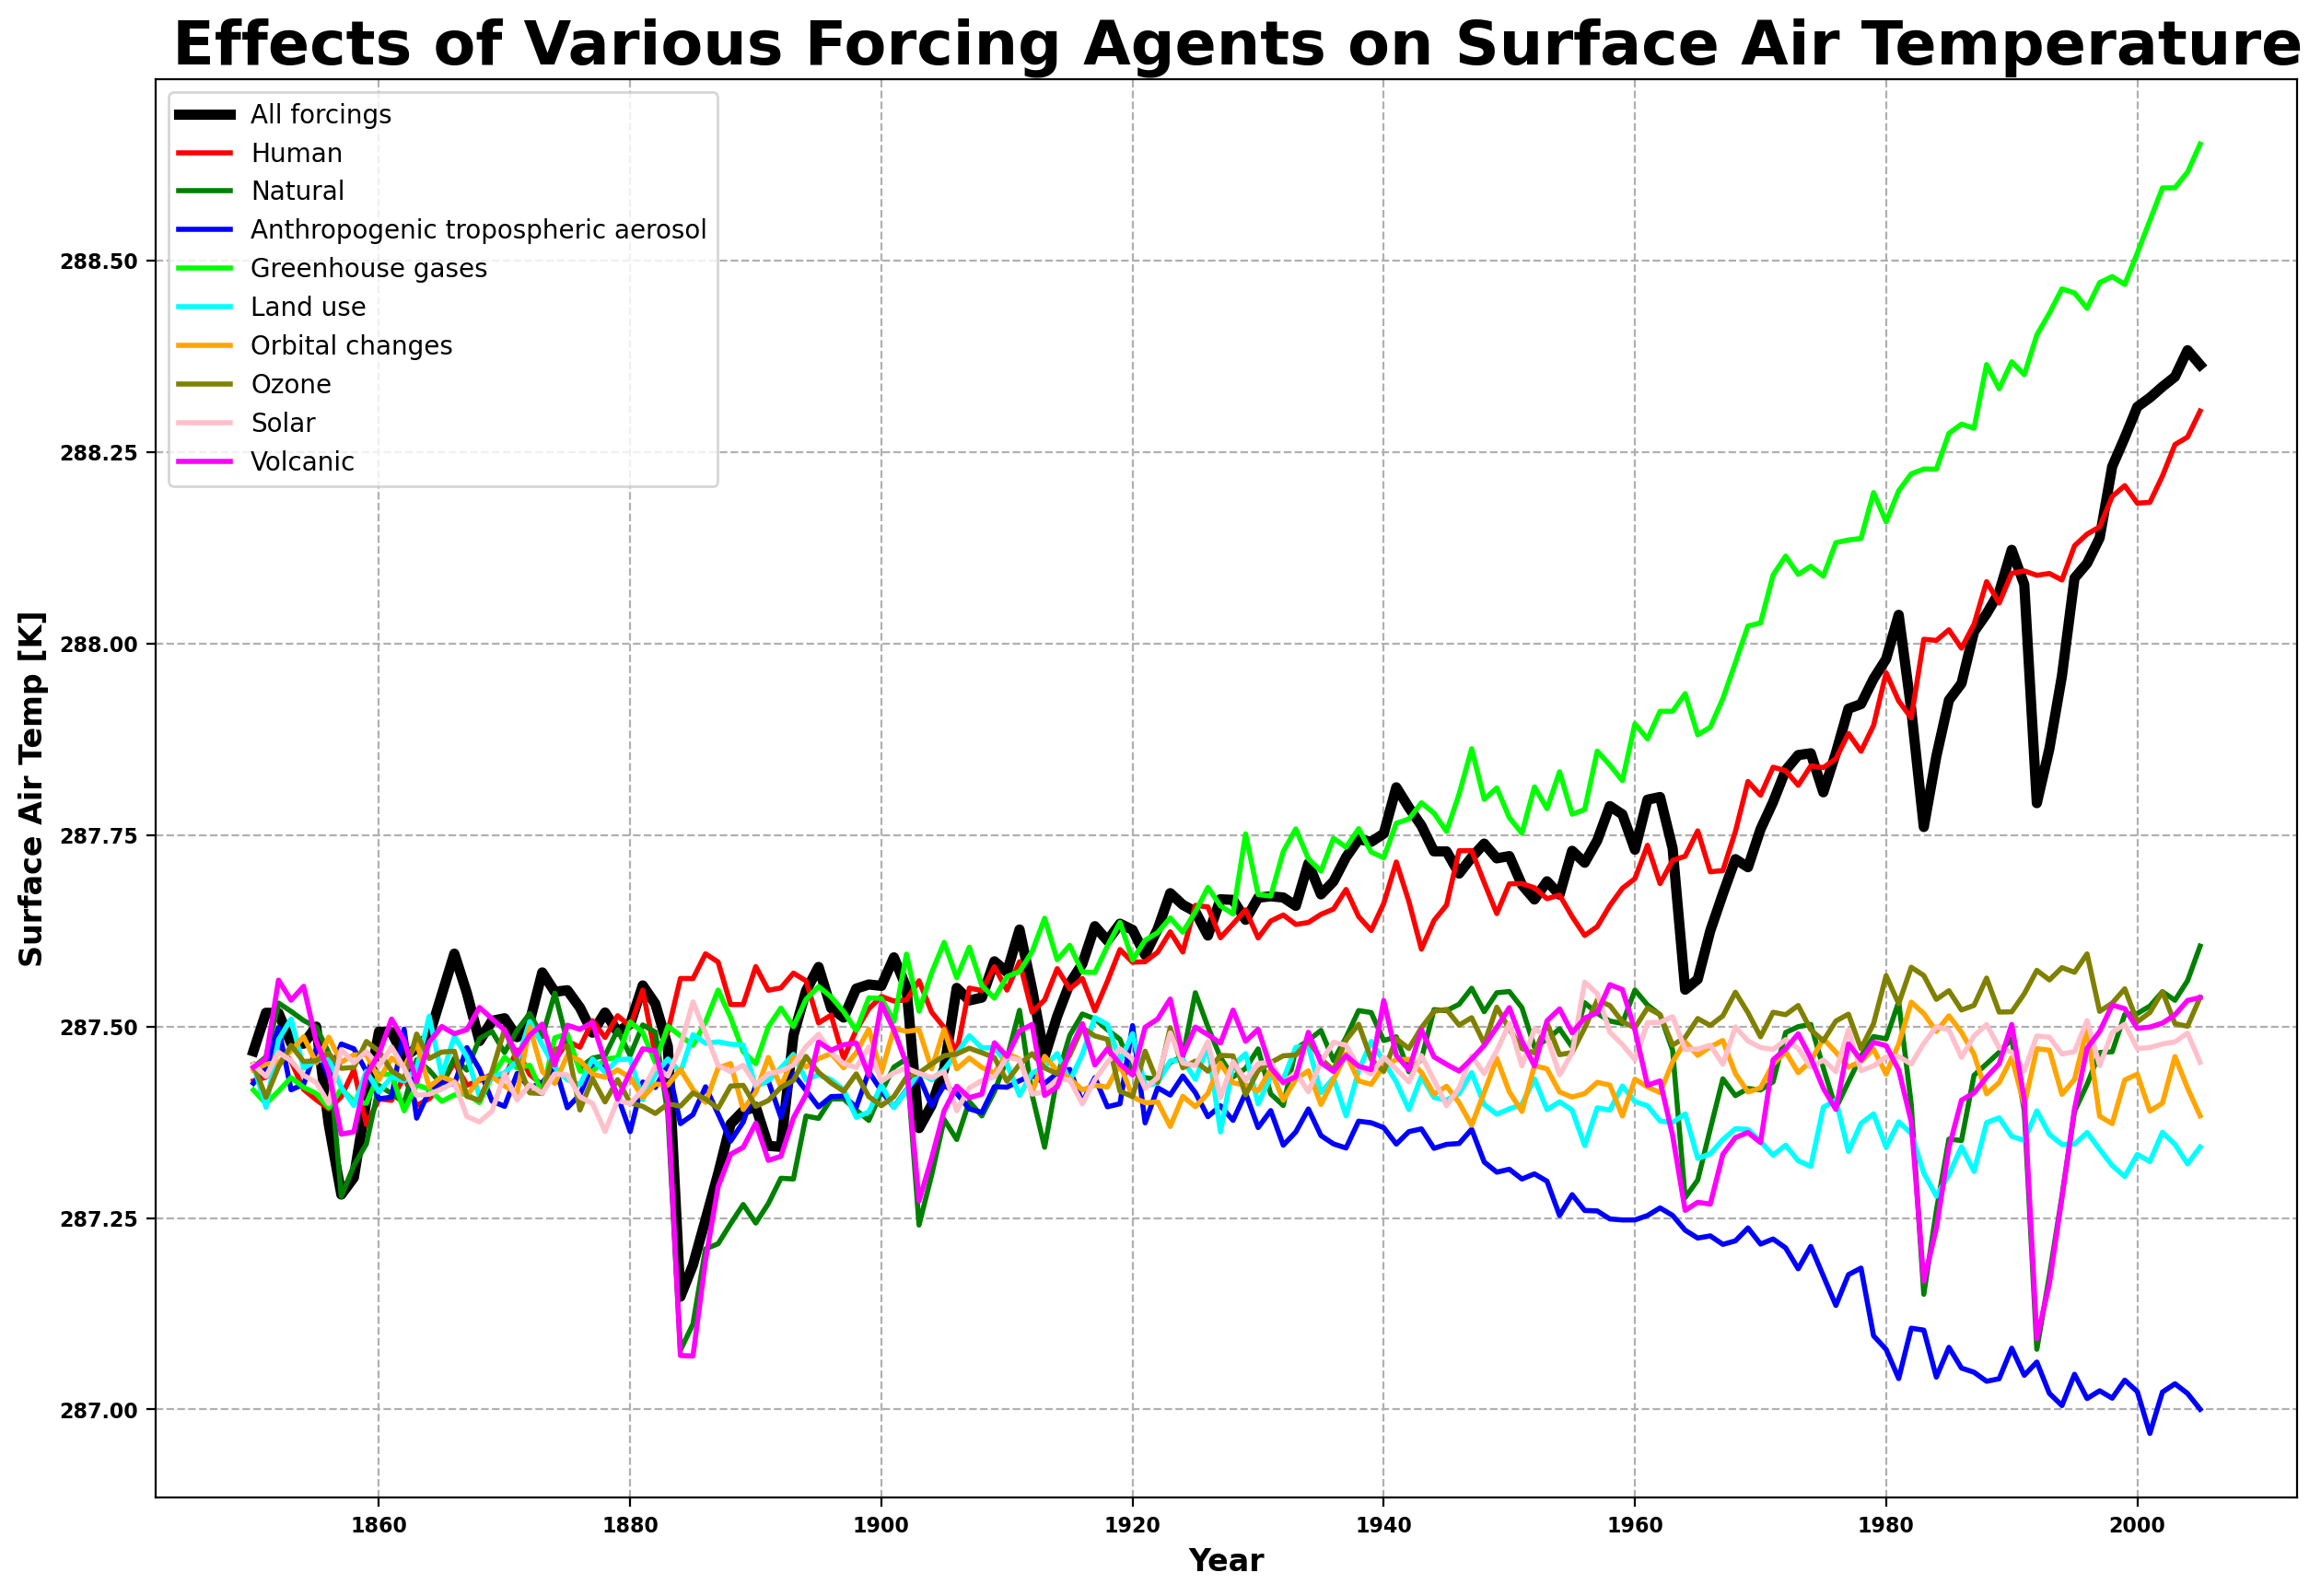

In [91]:
#creating a plot to visualize all the forcings and the range of resulting temperatures from NASA's GISS model simulation

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['All forcings'],
         linewidth=4,label='All forcings',
         color='black')

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Human'],
         linewidth=2,label='Human',
         color='red')

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Natural'],
         linewidth=2,label='Natural',
         color='green')

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Anthropogenic tropospheric aerosol'],
         linewidth=2,label='Anthropogenic tropospheric aerosol',
         color='blue')

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Greenhouse gases'],
         linewidth=2,label='Greenhouse gases',
         color='lime')

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Land use'],
         linewidth=2,label='Land use',
         color='cyan')

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Orbital changes'],
         linewidth=2,label='Orbital changes',
         color='orange')

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Ozone'],
         linewidth=2,label='Ozone',
         color='olive')

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Solar'],
         linewidth=2,label='Solar',
         color='pink')

ax.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Volcanic'],
         linewidth=2,label='Volcanic',
         color='fuchsia')

## Set properties of title, ylabels and xlabels
ax.set_title(' Effects of Various Forcing Agents on Surface Air Temperature',
             fontsize=24, fontweight='bold')
ax.set_ylabel('Surface Air Temp [K]',
             fontsize=12, fontweight='bold')
ax.set_xlabel('Year',
             fontsize=12, fontweight='bold')

plt.legend() 
plt.grid(linestyle='--') ## Add dashed grid lines

### adjust ticklabel font properties:
for tick in ax.get_xticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")
for tick in ax.get_yticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")



**Figure 5.** The resulting surface air temperatures through 1880-2014 were simulated by NASA's GISS ModelE2, which was developed at NASA's Goddard Institute for Space Studies and was forced by various climate agents. Average effect of all the forcing agents is represented by the thick black line. 

#  The Influence of Forcing Agents on Earth's Temperatures
GHG and human-forcing agents drastically drive surface temperatures up because they alter the amount of longwave radiation that can be released back into space. GHGs are the main culprits that are responsible for this effect because they trap outgoing longwave radiation, essentially insulating the atmosphere. GHGs are essential for making Earth habitable but an increase in human activity has led to an excess amount of them. The forcing agents that exhibit decreases in Earth's temperature come from volcanic activity and anthropogenic troposphere aerosols. Volcanic eruptions are natural which is why they follow the natural forcing temperature. When a volcano erupts, it releases large amounts of aerosols that scatter incoming short-wave radiation, effectively creating a net cooling effect. Solar, ozone, orbital changes, and land use all influence Earth's temperature in around the same way. Ozone, however, is an interesting agent. Ozone absorbs UV radiation which goes on to warm the stratosphere but it also absorbs infrared radiation which traps heat in the troposphere (the lowest layer)([UK Air](https://uk-air.defra.gov.uk/research/ozone-uv/moreinfo?view=deleption-climate-change#:~:text=Atmospheric%20ozone%20has%20two%20effects,trapping%20heat%20in%20the%20troposphere.)). Land use has the potential to influence temperatures more due to the fact it can alter albedo significantly. 


#  We are confident that the observed warming is the result of anthropogenic influence.
Naturally, forced surface temperatures see a cyclic change in their values on a short-term scale but stay relatively stable in the long term. When anthropogenic agents force the temperature, there is a steady long-term increase in warming from 1850 onward. If GHGs were to force the temperature alone, we see a magnitude difference of almost 5 degrees which can and has already significantly altered the quality of life across the world.

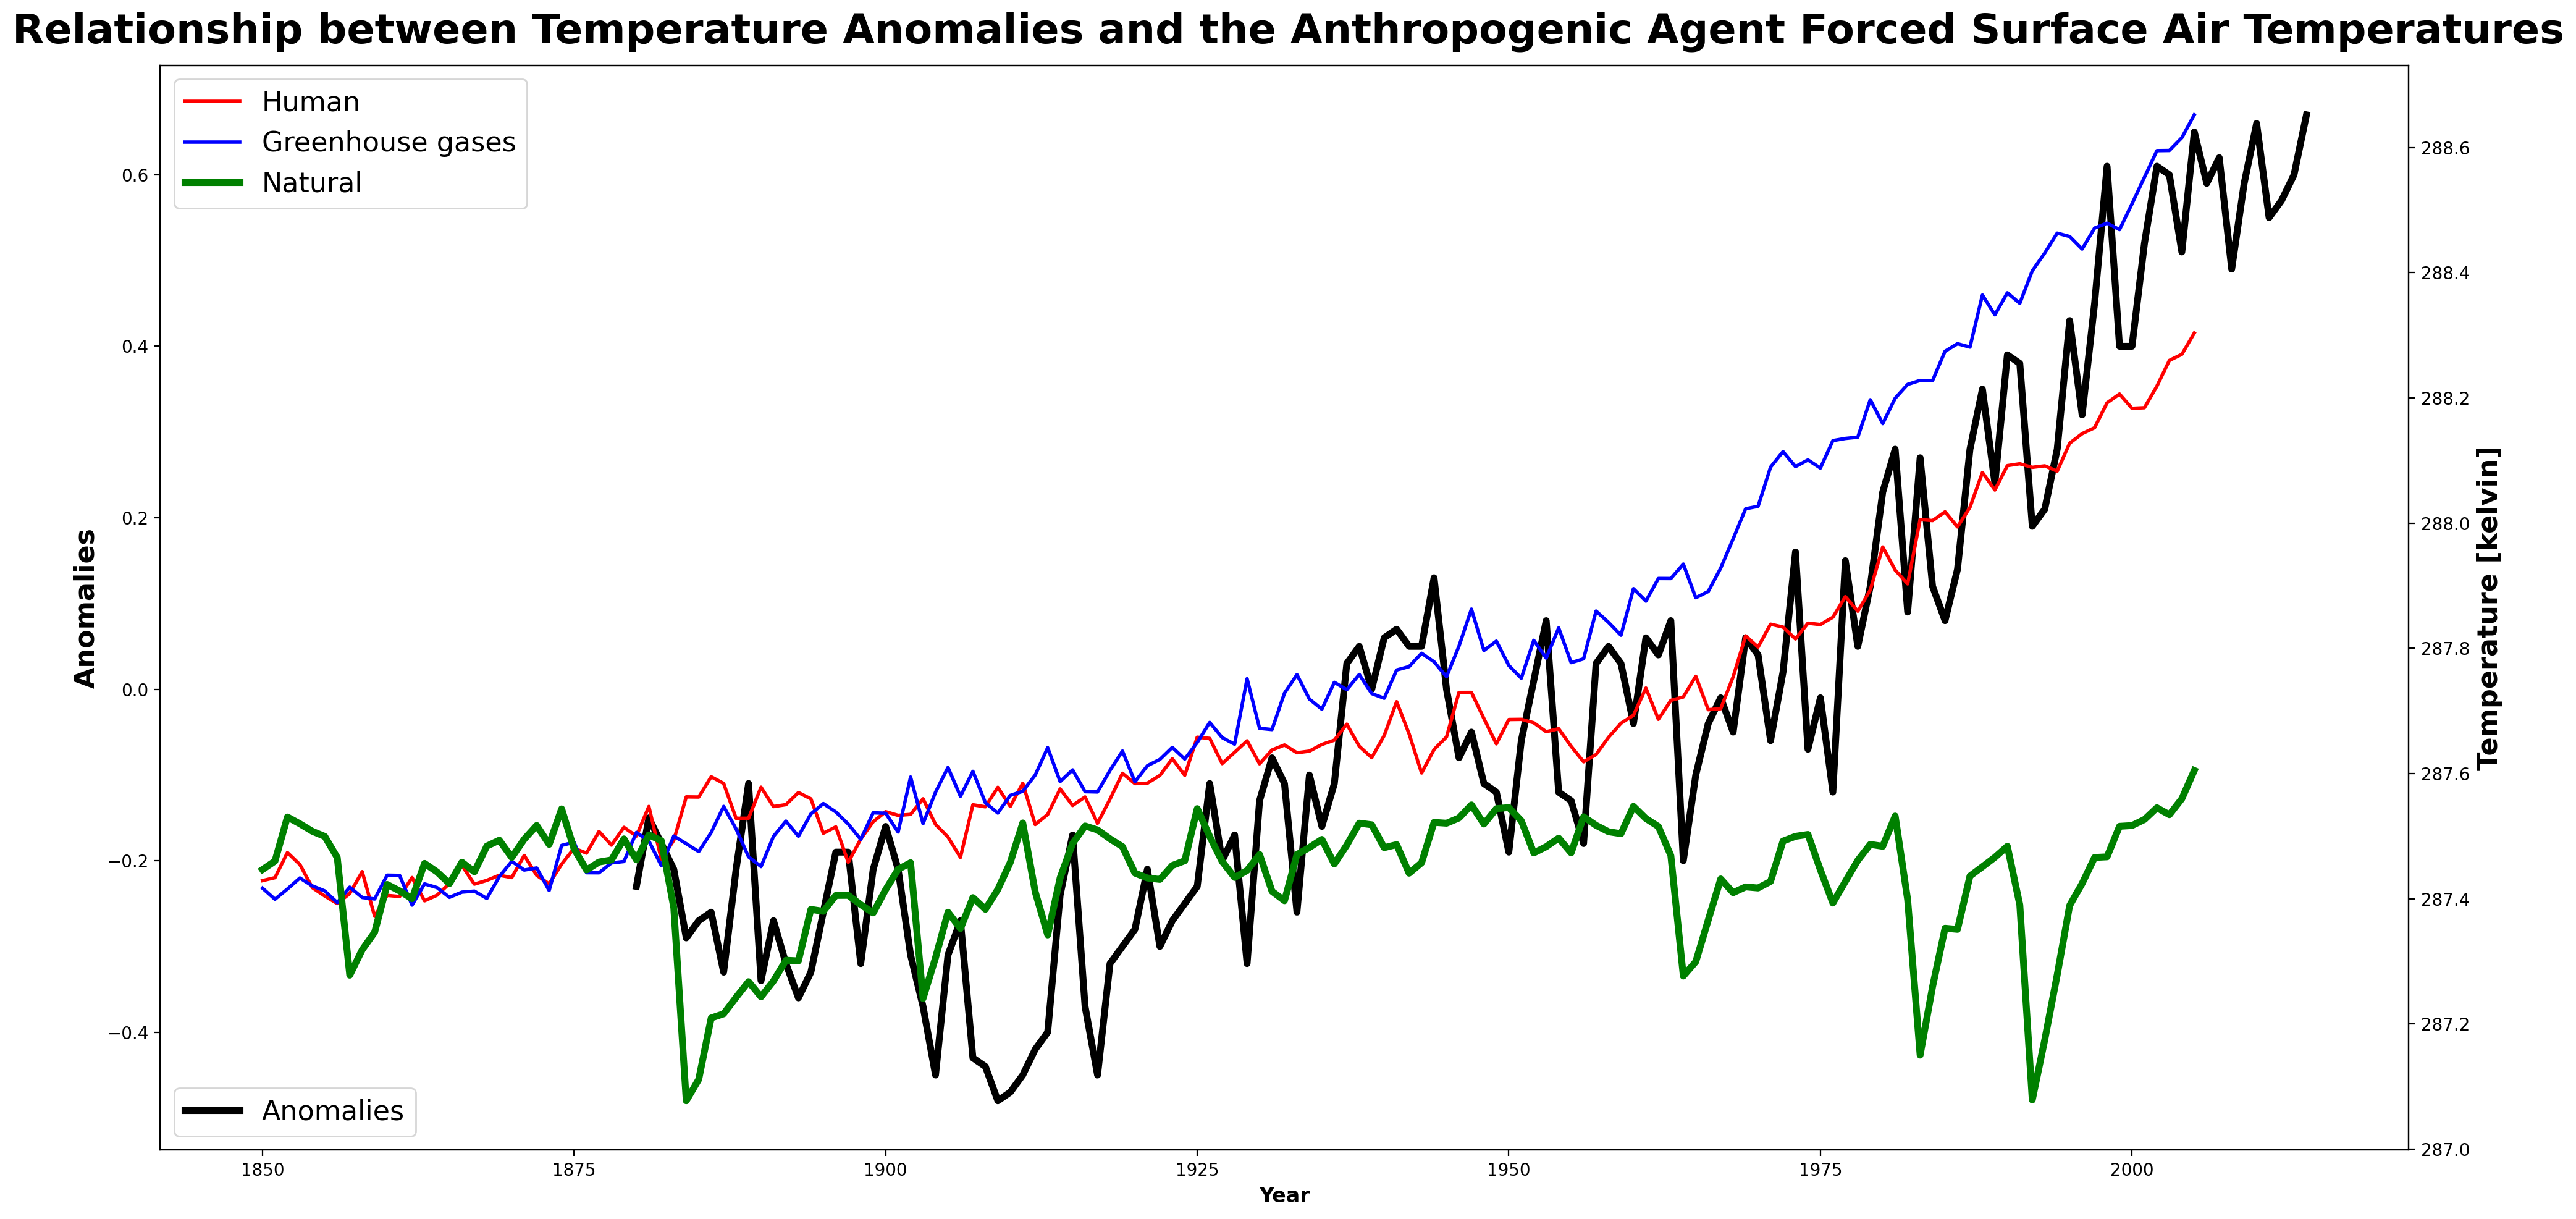

In [34]:
#creating a plot to visualize the Relationship between Temperature Anomalies and the Anthropogenic Agent Forced Surface Air Temperatures compared to naturally forced temps
fig, ax1 = plt.subplots(figsize=(20,10))
plt.suptitle('Relationship between Temperature Anomalies and the Anthropogenic Agent Forced Surface Air Temperatures',
             fontsize=24, fontweight='bold')

ax1.plot(Observed_Temps['Year'],
         Observed_Temps['Annual_Mean'],
         linewidth=4,label='Anomalies',
         color='black')

ax2=ax1.twinx()
ax2.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Human'],
         linewidth=2,label='Human',
         color='red')

ax2.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Greenhouse gases'],
         linewidth=2,label='Greenhouse gases',
         color='blue')

ax2.plot(NASA_GISS_Response['Year'],
         NASA_GISS_Response['Natural'],
         linewidth=4,label='Natural',
         color='green')

ax1.set_ylabel('Anomalies',
             fontsize=16, fontweight='bold')
ax2.set_ylabel('Temperature [kelvin]',fontsize=16, fontweight='bold')

ax1.set_xlabel('Year',
             fontsize=12, fontweight='bold')
## plot a legend on the ax
ax1.legend(fontsize=16,loc='lower left') 
ax2.legend(fontsize=16)
plt.tight_layout()

**Figure 5.** Observed surface air temperature anomalies and simulated surface air temperature throughout 1880-2014 from NASA's GISS ModelE2 single forcing experiments developed at NASA's Goddard Institute for Space Studies. 

# Final thoughts 
Various components of Earth's energy budget were analyzed to gain a deeper understanding of how they would affect surface temperatures. It can be said that the variation of TSI is negligible which allows us to treat the mean value as a constant. We saw that higher planetary albedo values can decrease the surface temperature whereas if the planetary albedo were to decrease even further than 0.3, we would see a dramatic increase in surface temperatures. We also modeled what surface temperatures would look like if Earth's emissivity were to decrease due to increased sea ice loss or deforestation. The lower emissivity would result in higher temperatures. We also took a look into the various effects that different climate-forcing agents have on surface temperatures and saw that GHG have the most influence on Earth's surface temperatures. The model proves why we are confident that observed warming is due to human activity. 